Question:

The boundary and initial conditions of an aluminium rod are:

$$T(x,0) = 0^{\circ}C \; \; where \; \; 0\leq x\leq 10$$

$$T(0,t) = 100^{\circ}C$$

$$T(10,t) = 50^{\circ}C$$

Given the thermal conductivity of aluminium $k=0.49$, density $\rho=2.7$ and heat capacity $C=0.2174$, solve the temperature distributions over time assuming $\Delta x=2$ and $\Delta t=0.1$.

Question from: https://www.youtube.com/watch?v=XjGiN7Fvyo0&t=63s

Conduction Equation used: $$\alpha \frac{\partial^2 T}{\partial x^2} = \frac{\partial T}{\partial t}$$

Discretization: $$T_i^{j+1} = -T_i^{j} + \lambda (T_{i+1}^{j+1} - 2T_i^{j+1} + T_{i-1}^{j+1})$$

where $\lambda = \alpha \frac{\Delta t}{\Delta x^2}$

In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
#Initializing the variables
x=10
dx=2
nx=6

nt=1
dt=0.1

k=0.49
rho=2.7
C=0.2174
lamda=k/(C*rho)*dt/dx**2
print(lamda)

T_init=np.zeros(nx)
xarr=np.linspace(0,x,nx)
print(xarr)

0.020869535588946813
[ 0.  2.  4.  6.  8. 10.]


In [95]:
#Boundary conditions
Tleft=100
Tright=100
T_init[0]=Tleft
T_init[-1]=Tright
print(T_init)

[100.   0.   0.   0.   0. 100.]


In [96]:
#Implicit numerical solution using TDMA

#Lower Diagonal matrix
a=[-lamda]*3+[0]

#Middle Diagonal matrix
b=[1.04175]*4

#Upper Diagonal Matrix
c=[0]+[-lamda]*3

#Right hand side of the system
d=[2.0875]+[0]*2+[2.0875]

print(a, b, c, d)

[-0.020869535588946813, -0.020869535588946813, -0.020869535588946813, 0] [1.04175, 1.04175, 1.04175, 1.04175] [0, -0.020869535588946813, -0.020869535588946813, -0.020869535588946813] [2.0875, 0, 0, 2.0875]


Iteration:  1
[2.00383969 0.04096419 0.04098031 2.00466066]


Iteration:  2
[3.92684737 0.12040322 0.12048128 3.93004906]


Iteration:  3
[5.77278707 0.23595646 0.2361832  5.78059194]


Iteration:  4
[7.54474743 0.3853757  0.38588805 7.55997005]


Iteration:  5
[9.24569329 0.56652053 0.56751295 9.27167491]


Iteration:  6
[10.8784707   0.77735376  0.77908405 10.91901857]


Iteration:  7
[12.44581162  1.01593713  1.01873071 12.50514285]


Iteration:  8
[13.95033855  1.28042707  1.28468001 14.03302816]


Iteration:  9
[15.39456886  1.56907064  1.57525165 15.50550179]


Iteration:  10
[16.78091904  1.88020169  1.888853   16.92524582]




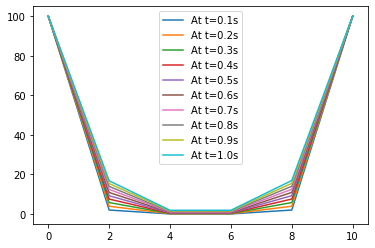

In [97]:
def TDMAAlgo(a,b,c,d):
    n = len(d)
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    p = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

labels = {1: "At t=0.1s", 2: "At t=0.2s", 3: "At t=0.3s", 4: "At t=0.4s", 5: "At t=0.5s", 6: "At t=0.6s", 7: "At t=0.7s", 8: "At t=0.8s", 9: "At t=0.9s", 10: "At t=1.0s"}
for it in range(0, 10):
    T_comp=TDMAAlgo(a,b,c,d)
    print("Iteration: ", it+1)
    print(T_comp)
    print("\n")
    d = [T_comp[0] + lamda*100, T_comp[1], T_comp[2], T_comp[3] + lamda*100]
    to_plot = [100] + list(T_comp) + [100]
    plt.plot(xarr, to_plot, label=labels[it+1])
    plt.legend()